## 텐서 다루기

In [6]:
from mytorch import *
import numpy as np
import mytorch.functions as F

x = Mytorch(np.array([[1, 2, 3], [4, 5, 6]]))
c = Mytorch(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
y = F.sum(t)

y

Mytorch(231)

In [7]:
x = Mytorch(np.array(2.0))
y = x ** 2
y.backward(create_graph=True)
gx = x.grad
x.cleargrad()

z = gx ** 3 + y
z.backward()
print(x.grad)

Mytorch(100.0)


In [8]:
x = Mytorch(np.array([[1, 2, 3], [4, 5, 6]]))
c = Mytorch(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
y = F.sum(t)

y.backward(retain_grad=True)
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

Mytorch(1)
Mytorch([[1 1 1]
          [1 1 1]])
Mytorch([[1 1 1]
          [1 1 1]])
Mytorch([[1 1 1]
          [1 1 1]])


In [9]:
class Reshape(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x): # 원하는 구성으로 통과
        self.x_shape = x.shape
        y = x.reshape(self.shape) 
        return y

    def backward(self, gy):
        return reshape(gy, self.x_shape) # 원본 형상을 기억해서 전달


def reshape(x, shape):
    if x.shape == shape:
        return as_mytorch(x)
    return Reshape(shape)(x)


In [10]:
x = Mytorch(np.array([[0, 1, 2], [3, 4, 5]]))
y = F.reshape(x, (6,))  # y = x.reshape(6)
y.backward(retain_grad=True)
print(x.grad)


x = Mytorch(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.transpose(x)  # y = x.T
y.backward()
print(x.grad)

Mytorch([[1 1 1]
          [1 1 1]])
Mytorch([[1 1 1]
          [1 1 1]])


In [11]:
y.backward(retain_grad=True)
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

Mytorch([[1 1]
          [1 1]
          [1 1]])
Mytorch([[1 1 1]
          [1 1 1]])
Mytorch([[2 2 2]
          [2 2 2]])
Mytorch([[1 1 1]
          [1 1 1]])


### 행렬 전치

In [12]:
Mytorch(np.array([[1, 2, 3], [4, 5, 6]])).reshape(3,2)

Mytorch([[1 2]
          [3 4]
          [5 6]])

In [13]:
def transpose(self, *axes):
        if len(axes) == 0:
            axes = None
        elif len(axes) == 1:
            if isinstance(axes[0], (tuple, list)) or axes[0] is None:
                axes = axes[0]
        return Mytorch.functions.transpose(self, axes)

@property
def T(self):
    return Mytorch.functions.transpose(self)

In [14]:
x=Mytorch(np.random.rand(2,3))
x.transpose()

Mytorch([[0.00600816 0.97518505]
          [0.62555368 0.88903984]
          [0.01403857 0.45423597]])

### sum 함수 순전파와 역전파 구현

In [15]:
class SumTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = sum_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)
        return gx


def sum_to(x, shape):
    if x.shape == shape:
        return as_mytorch(x)
    return SumTo(shape)(x)

In [16]:
class BroadcastTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        xp = np.array(x)
        y = xp.broadcast_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = sum_to(gy, self.x_shape)
        return gx

In [17]:
def broadcast_to(x, shape):
    if x.shape == shape:
        return as_mytorch(x)
    return BroadcastTo(shape)(x)

In [18]:
class Sum(Function):

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum()
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)
        return gx


In [19]:
x = Mytorch(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

Mytorch(21)
Mytorch([1 1 1 1 1 1])


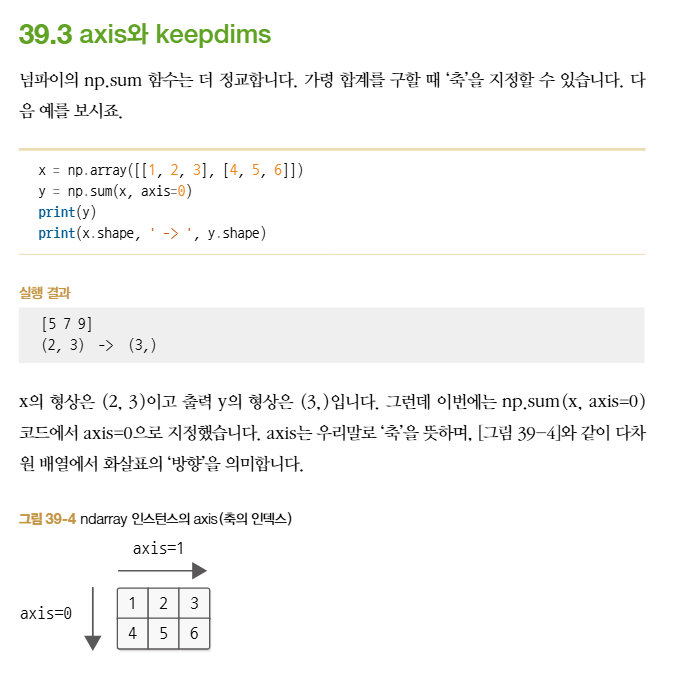

In [20]:
from mytorch import Mytorch
import mytorch.functions as F

x = Mytorch(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

x = Mytorch(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

x = Mytorch(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x, axis=0)
y.backward()
print(y)
print(x.grad)

x = Mytorch(np.random.randn(2, 3, 4, 5))
y = x.sum(keepdims=True)
print(y.shape)

Mytorch(21)
Mytorch([1 1 1 1 1 1])
Mytorch(21)
Mytorch([[1 1 1]
          [1 1 1]])
Mytorch([5 7 9])
Mytorch([[1 1 1]
          [1 1 1]])
(1, 1, 1, 1)


### 브로드캐스팅 구현

In [21]:
import numpy as np 

x=np.array([1, 2, 3])
y=np.broadcast_to(x,(3,3))
y


array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### broadcast, sum_to 코드 확인하기 

In [22]:
Mytorch(np.array([1, 2, 3]))+Mytorch(np.array([1, 2, 3]))

Mytorch([2 4 6])

In [23]:
Mytorch(np.array([1, 2, 3]))+Mytorch(np.array([13]))

Mytorch([14 15 16])

In [24]:
x0 = Mytorch(np.array([1, 2, 3]))
x1 = Mytorch(np.array([10]))
y = x0 + x1
print(y)

y.backward()
print(x1.grad)

Mytorch([11 12 13])
Mytorch([3])


## 행렬곱 구현

### 미분 체인룰 예시: y의 x에 대한 미분과 가중치 W_ij에 대한 미분

###### 1. 주어진 함수
우리는 `y = f(x, W)`로 주어지는 함수가 있다고 가정합니다.

- `x`는 입력 벡터
- `W`는 가중치 행렬
- `y`는 출력 벡터

`y`는 다음과 같이 선형 변환을 통해 정의된다고 가정합니다:

$$ y = W x $$

여기서 `W`는 가중치 행렬, `x`는 입력 벡터입니다.

###### 2. 미분 체인 룰 적용
우리는 `y`를 `x`와 `W`에 대해 미분하려고 합니다. `y = W x`에 대해 미분을 계산합니다.

###### (1) y의 x에 대한 미분
먼저 `y`를 `x`에 대해 미분하면, 이는 가중치 행렬 `W`가 그대로 남는 선형 변환입니다.

$$ \frac{\partial y}{\partial x} = W $$

###### (2) y의 W에 대한 미분
다음으로 `y`를 `W_ij`에 대해 미분하는 과정입니다. `y = W x`이므로, 각 `y_i`는 `W`의 i번째 행과 `x`의 곱으로 구성됩니다. `y_i = \sum_j W_{ij} x_j`입니다.

따라서, `y_i`를 `W_{ij}`에 대해 미분하면:

$$ \frac{\partial y_i}{\partial W_{ij}} = x_j $$

이는 `y_i`의 `W_{ij}`에 대한 미분이 해당하는 입력 `x_j`와 같다는 것을 의미합니다.

###### (3) 종합적으로
따라서 `y = W x`에서 `y`의 `W_ij`에 대한 미분은 각 입력 `x_j`에 대응하는 값이 됩니다. 즉, 행렬 `W`의 원소에 대한 미분은 다음과 같습니다:

$$ \frac{\partial y}{\partial W_{ij}} = x_j $$

##### 3. 결론
- `y`를 `x`에 대해 미분하면 `W`가 그대로 남습니다.
- `y`를 `W_{ij}`에 대해 미분하면 해당하는 입력 `x_j`가 결과로 나옵니다.

이를 통해 선형 변환에서의 미분 체인 룰을 적용한 결과를 얻을 수 있습니다.


#### 선형 모델에서의 미분 체인룰 예시

###### 1. 주어진 함수
선형 모델에서 출력 `y`는 입력 벡터 `x`와 가중치 행렬 `W`의 곱으로 정의됩니다:

$$ y = W x $$

여기서:
- `W`는 크기 `(m, n)`인 가중치 행렬입니다.
- `x`는 크기 `(n, 1)`인 입력 벡터입니다.
- `y`는 크기 `(m, 1)`인 출력 벡터입니다.

###### 2. `y`를 `x`에 대해 미분
`y = W x`이므로, `y`를 `x`에 대해 미분하면 `W`가 그대로 남습니다:

$$
\frac{\partial y}{\partial x} = W
$$

이는 `y`가 `x`에 대해 선형적으로 의존하고 있기 때문에, 미분한 결과가 가중치 행렬 `W`가 된다는 뜻입니다.

###### 3. `y`를 `W_{ij}`에 대해 미분
다음으로, `y`를 `W_{ij}`에 대해 미분하는 과정을 살펴봅니다. `y_i = \sum_{j} W_{ij} x_j`라고 할 수 있습니다. 따라서 `y_i`를 `W_{ij}`에 대해 미분하면:

$$
\frac{\partial y_i}{\partial W_{ij}} = x_j
$$

이는 각 출력 `y_i`가 가중치 `W_{ij}`와 `x_j`의 곱으로 정의되므로, 해당 `W_{ij}`에 대한 미분은 `x_j`가 된다는 의미입니다.

###### 4. 전체 미분
따라서 전체적으로 `y = W x`에서 `y`의 `W_{ij}`에 대한 미분은 다음과 같이 표현할 수 있습니다:

$$
\frac{\partial y}{\partial W_{ij}} = x_j
$$

이 결과는 선형 모델에서 가중치에 대한 미분이 입력 벡터의 해당 항목과 일치하는 것을 보여줍니다.

###### 5. 예시
구체적인 예시를 통해 선형 모델을 살펴보겠습니다. 예를 들어, `W`가 `(2, 3)`인 행렬이고, `x`가 `(3, 1)`인 벡터일 때:

$$
W = \begin{bmatrix} W_{11} & W_{12} & W_{13} \\ W_{21} & W_{22} & W_{23} \end{bmatrix}, \quad x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
$$

이때,

$$
y = W x = \begin{bmatrix} W_{11} & W_{12} & W_{13} \\ W_{21} & W_{22} & W_{23} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
= \begin{bmatrix} W_{11}x_1 + W_{12}x_2 + W_{13}x_3 \\ W_{21}x_1 + W_{22}x_2 + W_{23}x_3 \end{bmatrix}
$$

이제 `y`를 `W_{ij}`에 대해 미분하면:

$$
\frac{\partial y_1}{\partial W_{ij}} = x_j \quad \text{(for the first row of y)}
$$

$$
\frac{\partial y_2}{\partial W_{ij}} = x_j \quad \text{(for the second row of y)}
$$

따라서 `y`의 각 항목을 `W`의 각 원소에 대해 미분한 결과는 입력 `x`의 해당 항목과 같습니다.

###### 요약
- `y = W x`일 때, `y`를 `x`에 대해 미분하면 결과는 가중치 행렬 `W`입니다.
- `y`를 `W_{ij}`에 대해 미분하면 결과는 해당하는 입력 `x_j`입니다.
- 이러한 미분 계산은 선형 시스템에서 매우 중요한 역할을 합니다, 특히 신경망에서 역전파(backpropagation) 알고리즘에 활용됩니다.


In [25]:
import numpy as np

# 1. 내적 (Dot Product)
# 두 벡터를 정의합니다.
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])

# 내적 계산
dot_product = np.dot(vector_a, vector_b)

print("내적 (Dot Product):", dot_product)

# 2. 행렬 곱 (Matrix Multiplication)
# 두 행렬을 정의합니다.
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

# 행렬 곱 계산
matrix_product = np.dot(matrix_a, matrix_b)

print("행렬 곱 (Matrix Multiplication):\n", matrix_product)


내적 (Dot Product): 32
행렬 곱 (Matrix Multiplication):
 [[19 22]
 [43 50]]


In [26]:
class MatMul(Function):
    def forward(self, x, W):
        y = x.dot(W)
        return y

    def backward(self, gy):
        x, W = self.inputs
        gx = matmul(gy, W.T)
        gW = matmul(x.T, gy)
        return gx, gW


def matmul(x, W):
    return MatMul()(x, W)

In [27]:
x = Mytorch(np.random.randn(2, 3))
w = Mytorch(np.random.randn(3, 4))
y = matmul(x, w)
y.backward()

print(x.grad.shape)
print(w.grad.shape)

(2, 3)
(3, 4)


## 선형 회귀

Mytorch([[0.64433458]]) Mytorch([1.29473389]) Mytorch(42.296340129442335)
Mytorch([[1.12672345]]) Mytorch([2.26959351]) Mytorch(23.97380754378544)
Mytorch([[1.48734571]]) Mytorch([3.00386712]) Mytorch(13.609686745040522)
Mytorch([[1.75641886]]) Mytorch([3.557186]) Mytorch(7.747049961219976)
Mytorch([[1.95666851]]) Mytorch([3.97439789]) Mytorch(4.43057410592155)
Mytorch([[2.10518573]]) Mytorch([4.28923203]) Mytorch(2.554280381353593)
Mytorch([[2.21482401]]) Mytorch([4.52705574]) Mytorch(1.492599869047195)
Mytorch([[2.29524981]]) Mytorch([4.70694745]) Mytorch(0.8916952181756939)
Mytorch([[2.35373273]]) Mytorch([4.84325585]) Mytorch(0.5514270962227455)
Mytorch([[2.39573972]]) Mytorch([4.9467725]) Mytorch(0.3585915308319281)
Mytorch([[2.425382]]) Mytorch([5.02561369]) Mytorch(0.24915731977561134)
Mytorch([[2.44575118]]) Mytorch([5.08588371]) Mytorch(0.1869065876539789)
Mytorch([[2.45917205]]) Mytorch([5.13217364]) Mytorch(0.1513533629631488)
Mytorch([[2.4673927]]) Mytorch([5.16793652]) Myt

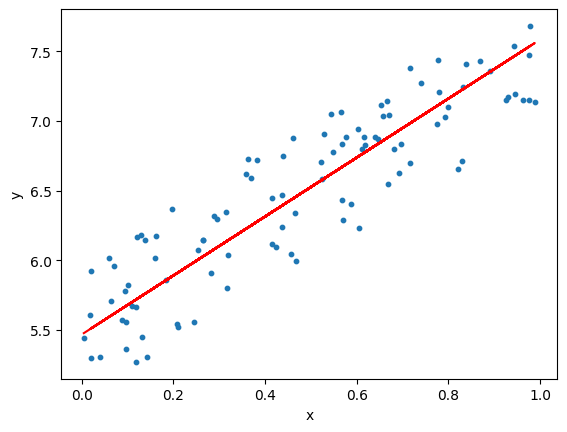

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mytorch import Mytorch
import mytorch.functions as F

# Generate toy dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Mytorch(x), Mytorch(y)

W = Mytorch(np.zeros((1, 1)))
b = Mytorch(np.zeros(1))


def predict(x):
    y = F.matmul(x, W) + b
    return y


def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)


lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    # Update .data attribute (No need grads when updating params)
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)


# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color='r')
plt.show()

In [29]:
print(type(loss))

<class 'mytorch.class_mytorch.Mytorch'>


## 신경망

## afine 연산

In [30]:
class Linear(Function):
    def forward(self, x, W, b):
        y = x.dot(W)
        if b is not None:
            y += b
        return y
def linear(x, W, b=None):
    return Linear()(x, W, b)


def linear_simple(x, W, b=None):
    t = matmul(x, W)
    if b is None:
        return t

    y = t + b
    t.data = None  # Release t.data (ndarray) for memory efficiency
    #! 중간중간 남아있는 텐서 인스턴스들을 메모리 해제를 해주자!
    return y

In [31]:
F.matmul(x,W)+b

Mytorch([[6.62851649]
          [6.98091283]
          [6.7427863 ]
          [6.62019179]
          [6.36342114]
          [6.83414038]
          [6.39293101]
          [7.35492998]
          [7.50719779]
          [6.27824644]
          [7.14302102]
          [6.58632747]
          [6.66924929]
          [7.42657094]
          [5.61654866]
          [5.65063533]
          [5.50891311]
          [7.22963924]
          [7.11428239]
          [7.30883889]
          [7.53887481]
          [7.15876578]
          [6.44353635]
          [7.11930736]
          [5.716603  ]
          [6.82148893]
          [5.76972188]
          [7.46696743]
          [6.57140225]
          [6.3443736 ]
          [6.02643733]
          [7.10597306]
          [6.43224907]
          [6.67007404]
          [5.50588723]
          [6.77428655]
          [6.7625529 ]
          [6.77280072]
          [7.46501703]
          [6.91023469]
          [6.22755328]
          [6.39175493]
          [6.94372333]
          [5

### 비선형 예측

Mytorch(0.8473695850105871)
Mytorch(0.25142862851836056)
Mytorch(0.2475948546674987)
Mytorch(0.23786120447054807)
Mytorch(0.21222231333102914)
Mytorch(0.1674218111783414)
Mytorch(0.09681932619992649)
Mytorch(0.07849528290602333)
Mytorch(0.07749729552991157)
Mytorch(0.07722132399559314)


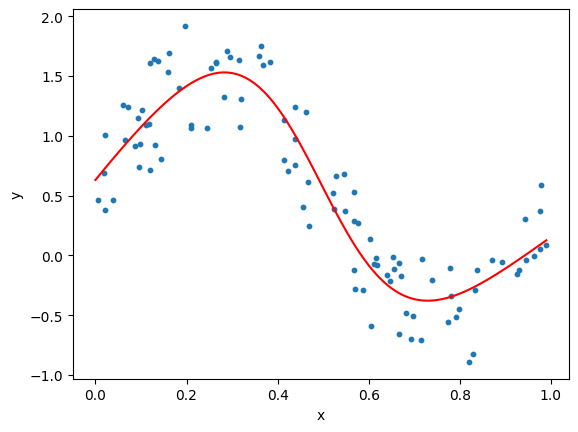

In [32]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Mytorch(0.01 * np.random.randn(I, H))
b1 = Mytorch(np.zeros(H))
W2 = Mytorch(0.01 * np.random.randn(H, O))
b2 = Mytorch(np.zeros(O))


def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

#! 오차를 최소화하는 원리는 
#! 손실함수의 미분식으로부터 각 계층들은 자기의 미분을 전달 받고
#! 이를 optim 정책에 따라 가중치를 반복적으로 갱신한다.
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()


    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

In [33]:
import numpy as np
import mytorch.functions as F
import mytorch.layers as L


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10)
l2 = L.Linear(1)


def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

Mytorch(0.8165178492839196)
Mytorch(0.24990280802148895)
Mytorch(0.24609876581126014)
Mytorch(0.2372159081431807)
Mytorch(0.20793216413350174)
Mytorch(0.12311905720649356)
Mytorch(0.0788816650635515)
Mytorch(0.07655073683421637)
Mytorch(0.07637803086238226)
Mytorch(0.07618764131185567)


In [34]:
import numpy as np
from mytorch import Mytorch
from mytorch import Model
import mytorch.layers as L
import mytorch.functions as F


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# Hyperparameters
lr = 0.2
max_iter = 10000
hidden_size = 10

# Model definition
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(hidden_size, 1)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

Mytorch(0.8165178492839196)
Mytorch(0.24990280802148895)
Mytorch(0.24609876581126014)
Mytorch(0.2372159081431807)
Mytorch(0.20793216413350174)
Mytorch(0.12311905720649356)
Mytorch(0.0788816650635515)
Mytorch(0.07655073683421637)
Mytorch(0.07637803086238226)
Mytorch(0.07618764131185567)


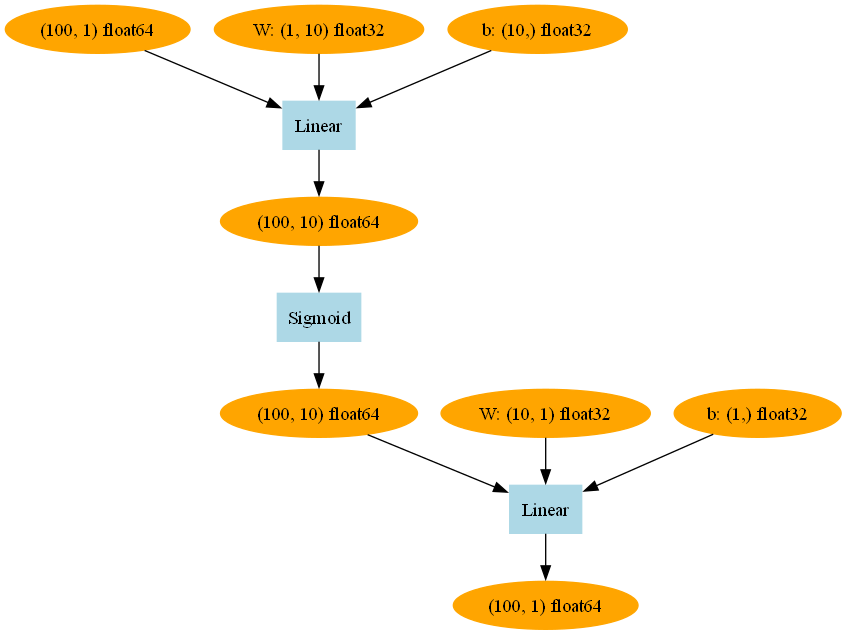

In [35]:
model.plot(x)

### optimizer

In [36]:
from mytorch import optimizers
import mytorch.functions as F
from mytorch.models import MLP


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr).setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(loss)

Mytorch(0.8165178492839196)
Mytorch(0.24990280802148895)
Mytorch(0.24609876581126014)
Mytorch(0.2372159081431807)
Mytorch(0.20793216413350174)
Mytorch(0.12311905720649356)
Mytorch(0.0788816650635515)
Mytorch(0.07655073683421637)
Mytorch(0.07637803086238226)
Mytorch(0.07618764131185567)


In [37]:
from mytorch import optimizers
import mytorch.functions as F
from mytorch.models import MLP
def softmax1d(x):
    x = as_mytorch(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y / sum_y


model = MLP((10, 3))

x = Mytorch(np.array([[0.2, -0.4]]))
y = model(x)
p = softmax1d(y)
print(y)
print(p)

x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2, 0, 1, 0])

y = model(x)
p = F.softmax_simple(y)
print(y)
print(p)



Mytorch([[0.25337848 0.30853735 0.38821423]])
Mytorch([[0.31239678 0.33011233 0.35749089]])
Mytorch([[ 2.53378479e-01  3.08537353e-01  3.88214228e-01]
          [-3.35541286e-02  1.10980042e-01  1.05230574e-01]
          [ 5.91540732e-01  6.00826427e-01  9.00905530e-01]
          [-2.85549680e-01 -3.86615460e-02 -6.48145677e-04]])
Mytorch([[0.31239678 0.33011233 0.35749089]
          [0.30262882 0.34968796 0.34768321]
          [0.29656973 0.29933641 0.40409386]
          [0.27703386 0.35461329 0.36835284]])


epoch 1, loss 1.13
epoch 101, loss 0.42
epoch 201, loss 0.17


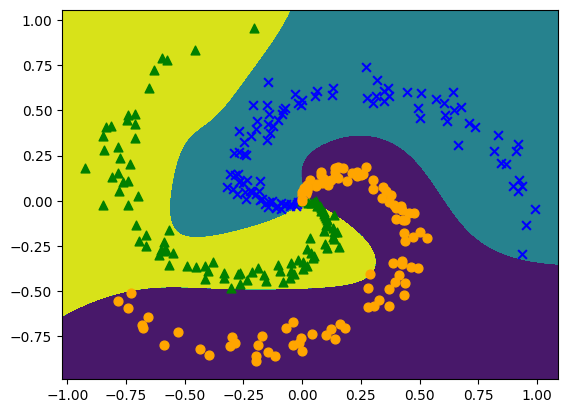

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mytorch
from mytorch import optimizers
import mytorch.functions as F
from mytorch.models import MLP

# Hyperparameters
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = mytorch.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss every epoch
    avg_loss = sum_loss / data_size
    if epoch % 100==0:
        print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with mytorch.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()